In [1]:
%matplotlib inline
import os
import lenspyx
from lenspyx.utils import camb_clfile,camb_clfile2
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk

In [4]:
path = "/global/cscratch1/sd/lonappan/S4BIRD/CAMB/"
len_file = "BBSims_lensed_dls.dat"
scal_file =  "BBSims_scal_dls.dat"
tens_file = "BBSims_tens_dls.dat"
pot_file = "BBSims_lenspotential.dat"

In [5]:
lensed = camb_clfile2(os.path.join(path, len_file))
scalar = camb_clfile2(os.path.join(path, scal_file))
tensor = camb_clfile2(os.path.join(path, tens_file))
poten = camb_clfile2(os.path.join(path, pot_file))

In [7]:
n = np.radians(2.16/60)**2

(2, 3000)

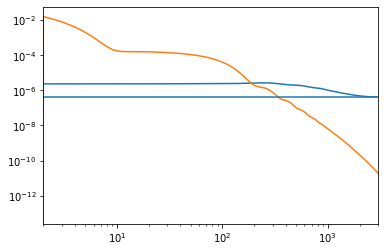

In [8]:
plt.loglog(lensed['bb']+n)
plt.loglog(tensor['bb'])
plt.axhline(n)
plt.xlim(2,3000)

In [9]:
ell = np.arange(len(lensed['bb']))

In [25]:
def sigma_r(alens=1,fsky=.5,lmin=10,lmax=150):
    f_rr = (ell[lmin:lmax+1] + 0.5)*fsky * ((tensor['bb'][lmin:lmax+1]/((alens*lensed['bb'][lmin:lmax+1]+n)))**2)
    return f"{np.sum(f_rr)**-.5:.2e}"

In [26]:
sigma_r(1)

'5.09e-04'

In [27]:
sigma_r(.88)

'4.58e-04'

In [13]:
sigma_r(.45,.4)

0.000347857321271181